# Avance 1

Sofia Alvarez Sandoval A01656059

David Alejandro Matamoros Alvarado  A01655865

Felipe de Jesús Félix Arredondo A00833150

Raúl Alejandro Pérez Saucedo  A01566937

Ana Paola Almeida Pérez  A00833937

Valeria María Serna Salazar A01284960 

## Importamos librerías

In [6]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from scipy.signal import welch
from pathlib import Path
from scipy import stats
import numpy as np


## Función de generación de señales

In [7]:
def make_gravitational_waves(
    path_to_data: Path, #Ruta al archivo de datos de ondas gravitacionales.
    n_signals: int = 30, #Número de señales a generar.
    downsample_factor: int = 2, #Factor de reducción de muestreo para las señales 
    r_min: float = 0.075, #Valor mínimo del coeficiente de relación señal-ruido
    r_max: float = 0.65, #Valor máximo del coeficiente SNR
    n_snr_values: int = 10, #Número de valores de coeficiente SNR a generar
        ):
    def padrand(V, n, kr): #agregar ruido aleatorio a las señales.
        cut = np.random.randint(n)
        rand1 = np.random.randn(cut)
        rand2 = np.random.randn(n - cut)
        out = np.concatenate((rand1 * kr, V, rand2 * kr))
        return out

    Rcoef = np.linspace(r_min, r_max, n_snr_values)
    Npad = 500  #número de padding points a cada lado del vector
    gw = np.load(path_to_data)
    Norig = len(gw["data"][0])
    Ndat = len(gw["signal_present"])
    N = int(Norig / downsample_factor)

    ncoeff = []
    Rcoeflist = []

    for j in range(n_signals):
        ncoeff.append(10 ** (-19) * (1 / Rcoef[j % n_snr_values]))
        Rcoeflist.append(Rcoef[j % n_snr_values])

    noisy_signals = []
    gw_signals = []
    k = 0
    labels = np.zeros(n_signals)

    for j in range(n_signals):
        signal = gw["data"][j % Ndat][range(0, Norig, downsample_factor)]
        sigp = int((np.random.randn() < 0))
        noise = ncoeff[j] * np.random.randn(N)
        labels[j] = sigp
        if sigp == 1:
            rawsig = padrand(signal + noise, Npad, ncoeff[j])
            if k == 0:
                k = 1
        else:
            rawsig = padrand(noise, Npad, ncoeff[j])
        noisy_signals.append(rawsig.copy())
        gw_signals.append(signal)

    return noisy_signals, gw_signals, labels

## Lectura del archivo y generación de las señales

In [8]:
path = Path(r'C:\Users\Ana Paola A.P\Downloads\Archivos python\reto topo\gravitational_wave_signals.npy')

noisy_signals, gw_signals, labels = make_gravitational_waves(path)

In [9]:
noisy_signals

[array([-1.94362295e-18, -5.20374172e-19,  2.92777309e-19, ...,
        -2.13853661e-18, -1.12474484e-18, -3.34712065e-19]),
 array([-5.70265233e-19, -5.48645898e-19, -1.28918899e-18, ...,
        -5.50507932e-19, -3.87404482e-19,  1.73279397e-19]),
 array([ 5.90154736e-19, -1.96610845e-19,  7.91738370e-21, ...,
         1.27873430e-19, -2.61112035e-19, -4.35498073e-19]),
 array([ 7.76047798e-20,  1.84417098e-19,  5.99303252e-20, ...,
        -1.96037820e-19,  8.42960499e-20,  1.40144675e-19]),
 array([ 2.20706790e-19, -1.12172831e-19, -1.66452129e-19, ...,
        -3.18261511e-20, -3.19888597e-19, -1.93932888e-19]),
 array([ 4.81294852e-19, -2.49058682e-19, -1.48750043e-19, ...,
        -2.51106764e-19,  4.25013592e-19, -2.78515013e-19]),
 array([ 1.62537051e-19,  4.67832619e-20,  1.49130136e-19, ...,
         4.19346084e-20, -1.49069110e-20,  2.84285308e-19]),
 array([-2.75794912e-20,  1.12581588e-19,  3.78658046e-20, ...,
        -1.79410222e-19,  2.60539262e-19,  7.35174550e-20]),


In [10]:
gw_signals

[array([ 1.71223261e-22, -5.33559520e-22, -2.16195790e-22, ...,
         3.99231527e-22,  1.68263427e-22,  1.90632034e-22]),
 array([ 7.08797138e-23,  2.73109996e-23, -2.72002452e-22, ...,
         5.37241904e-24,  3.20201687e-23, -1.21969154e-22]),
 array([ 3.01801020e-22, -1.89529496e-22,  2.59928509e-22, ...,
         9.10473185e-23, -2.26349970e-22, -3.20018859e-22]),
 array([-3.16261507e-22,  1.96737655e-23, -2.29684026e-22, ...,
         2.60083071e-22, -4.04911870e-22,  8.19284851e-23]),
 array([ 5.21553495e-22, -2.20225261e-22, -1.91977972e-22, ...,
        -2.82917262e-22,  3.32872075e-23, -2.83683861e-22]),
 array([ 2.30166422e-22, -2.75321029e-22, -4.18812488e-22, ...,
        -3.79098083e-22, -2.14113877e-22,  5.81721576e-23]),
 array([-1.82467634e-22,  1.66186683e-23, -3.34086113e-22, ...,
        -9.20500344e-23, -2.89926410e-22, -3.64698069e-22]),
 array([-2.48155859e-22,  1.85442282e-23,  3.45288644e-22, ...,
        -3.19441358e-22, -3.21202002e-22,  3.51145296e-22]),


In [11]:
labels

array([1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0.])

## Histograma y Densidad espectral de potencia (PSD) de la primera señal de onda gravitacional

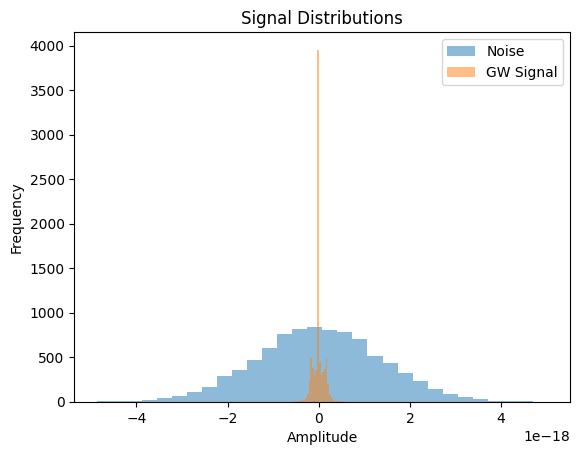

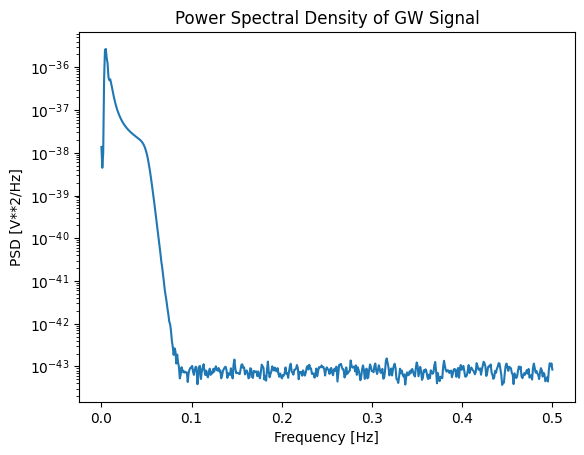

In [12]:
#  Histogramas de las amplitudes de la primera señal ruidosa y onda gravitacional 
plt.hist(noisy_signals[0], bins=30, alpha=0.5, label='Noise')
plt.hist(gw_signals[0], bins=30, alpha=0.5, label='GW Signal')
plt.title('Signal Distributions')
plt.xlabel('Amplitude')
plt.ylabel('Frequency')
plt.legend()
plt.show()


f, Pxx = welch(gw_signals[0], fs=1.0, nperseg=1024)  #calcular la densidad espectral de potencia de la primera gw
plt.semilogy(f, Pxx) #logaritmo de la densidad espectral de potencia en función de la frecuencia
plt.title('Power Spectral Density of GW Signal')
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

Histograma de Distribuciones de Señal

La señal ruidosa (Noise) tiene una distribución más uniforme a lo largo de un rango de amplitudes, lo que indica variabilidad y falta de una amplitud dominante.
La señal de onda gravitacional (GW Signal) muestra un pico prominente en una amplitud específica, lo que sugiere una característica distintiva o un evento en la señal que domina sobre el ruido de fondo.
Gráfico de Densidad Espectral de Potencia (PSD)

El gráfico PSD en escala logarítmica muestra cómo la potencia de la señal GW se distribuye a través de diferentes frecuencias.
Un pico en el gráfico PSD puede indicar la presencia de una frecuencia dominante o una resonancia en la señal GW.

## Series temporales de las señales 

In [13]:
# Índice correspondiente a la primera serie temporal de pura señal de ruido
background_idx = np.argmin(labels)
# Índice correspondiente a la primera serie con ruido y la onda gravitacional
signal_idx = np.argmax(labels)

ts_noise = noisy_signals[background_idx]
ts_background = noisy_signals[signal_idx]
ts_signal = gw_signals[signal_idx]

fig = make_subplots(rows=1, cols=2) 

fig.add_trace(
    go.Scatter(x=list(range(len(ts_noise))), y=ts_noise, mode="lines", name="noise"),
    row=1,
    col=1,
)

fig.add_trace(
    go.Scatter(
        x=list(range(len(ts_background))),
        y=ts_background,
        mode="lines",
        name="background",
    ),
    row=1,
    col=2,
)

fig.add_trace(
    go.Scatter(x=list(range(len(ts_signal))), y=ts_signal, mode="lines", name="signal"),
    row=1,
    col=2,
)
fig.show()

Se crean dos subgráficos usando make_subplots(rows=1, cols=2). En el primer subgráfico, se traza ts_noise para visualizar la señal de ruido. En el segundo, se superponen ts_background y ts_signal para comparar cómo se ve la señal de ruido por sí sola versus cómo se ve cuando está presente una onda gravitacional.

El gráfico de la izquierda muestra la serie temporal de ruido, que tiene fluctuaciones aleatorias a lo largo del tiempo, representando la naturaleza errática del ruido.
El gráfico de la derecha muestra tres líneas:
La línea de ruido (rojo) tiene un patrón similar al gráfico de la izquierda, indicando su presencia constante.
La línea de señal (verde claro) muestra una forma distintiva, posiblemente indicando la presencia de una onda gravitacional detectable entre el ruido.